alg_2 is the same as alg_1 except all calculations are done in the body frame. The lab frame angular momentum is still kept as an input because it is the one that is conserved

In [1]:
cd ../src

/home/david/src/4DRigid/src


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import alg_2 as pusher
import quat
import rot

def test(L,J0,dt,N,dumpFreq,ql_init=None,qr_init=None):
    if ql_init==None and qr_init==None:
        qlsim=[1,0,0,0]
        qrsim=[1,0,0,0]
    else:
        qlsim=ql_init
        qrsim=qr_init
    qls=[qlsim]
    qrs=[qrsim]
    ts=[0]
    tsim=0
    
    for i in range(N):
        qlsim,qrsim=pusher.step(qlsim,qrsim,L,J0,dt)
        tsim+=dt
        if(i%dumpFreq==0):
            qls.append(qlsim)
            qrs.append(qrsim)
            ts.append(tsim)
            print(str(i)+'/'+str(N)+'\r',end='')
    qls=np.array(qls)   
    qrs=np.array(qrs)
    ts=np.array(ts)
    Rs=[rot.as_matrix(qls[i],qrs[i]) for i in range(len(qls))]
    KEs=[pusher.getKE(qls[i],qrs[i],L,J0) for i in range(len(qls))]
    Omegas=[pusher.solveOmega(qls[i],qrs[i],L,J0) for i in range(len(qls))]
    Rs=np.array(Rs)
    KEs=np.array(KEs)
    Omegas=np.array(Omegas)
    return ts,qls,qrs,Rs,KEs,Omegas

## A constant rotation of a 4D sphere
sanity check

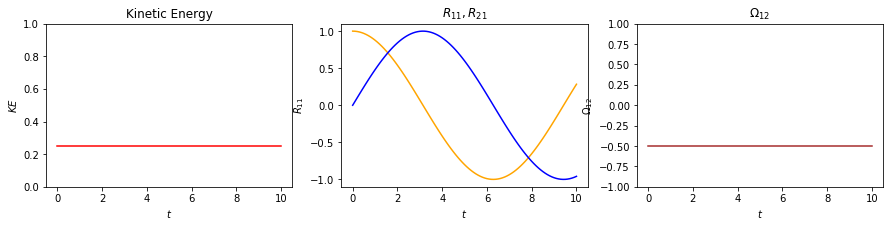

In [3]:
# test parameters
J0 = np.diag([1,1,1,1]) # principal 2nd moments
L = np.array([[0,1,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0]])# Angular momentum, specify the upper triangle
L = L-L.T # completes the lower half
# run test
ts,qls,qrs,Rs,KEs,Omegas=test(L,J0,dt=0.1,N=100,dumpFreq=1)

fig = plt.figure(figsize=(15,3))
ax=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax.set_title('Kinetic Energy')
ax.set_xlabel('$t$')
ax.set_ylabel('$KE$')
ax.set_ylim(bottom=0,top=1)
ax.plot(ts,KEs,c='red')

ax2.set_title('$R_{11},R_{21}$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$R_{11}$')
#ax2.set_ylim(bottom=-1,top=1)
ax2.plot(ts,Rs[:,0,0],c='orange')
ax2.plot(ts,Rs[:,1,0],c='blue')

ax3.set_title('$\Omega_{12}$')
ax3.set_xlabel('$t$')
ax3.set_ylabel('$\Omega_{12}$')
ax3.set_ylim(bottom=-1,top=1)
ax3.plot(ts,Omegas[:,0,1],c='brown')

In [4]:
print(Omegas[0])
print(Rs[10])
print(KEs[10])

[[ 0.  -0.5  0.   0. ]
 [ 0.5  0.   0.   0. ]
 [-0.  -0.   0.   0. ]
 [-0.  -0.  -0.   0. ]]
[[ 0.87758256 -0.47942554  0.          0.        ]
 [ 0.47942554  0.87758256  0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
0.24999999999999994


As seen above, only the xy moments should matter. We can collapse the zw dimensions onto the xy plane. We would have a 2D disk with non-uniform density $\rho(r)$. In 2D, the only moment of inertia is
$$I=\sum_{\alpha}m_{\alpha}r_{\alpha}^2=\sum_{\alpha}m_{\alpha}x_{\alpha}^2+\sum_{\alpha}m_{\alpha}y_{\alpha}^2=J_{xx}+J_{yy}$$
In this case we have $J_{xx}=J_{yy}=1$. So $I=2$.
In 2D we also have $L=I\omega$ and $T=\frac{1}{2}I\omega^2$. Therefore
$$\omega=\frac{L}{I}=\frac{1}{2}$$
$$T=\frac{1}{2}\cdot2\cdot\left(\frac{1}{2}\right)^2=\frac{1}{4}$$
Period of rotation is
$$P=\frac{2\pi}{\omega}=4\pi$$
In plot for $R_{11}$ we see a it traverses half an oscillation in $t=2\pi$. All check.

## Can we ignore the 4th dimension in some cases?

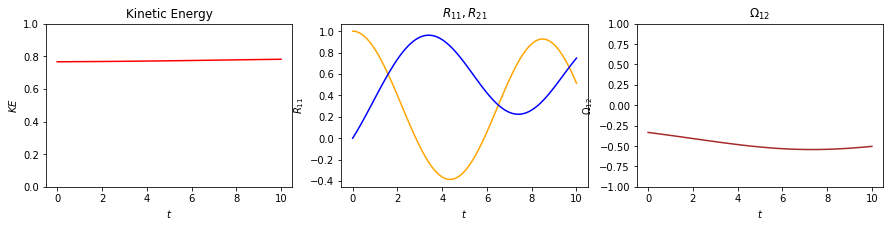

In [5]:
# test parameters
J0 = np.diag([1,2,3,4]) # principal 2nd moments
L = np.array([[0,1,2,0],
              [0,0,-1,0],
              [0,0,0,0],
              [0,0,0,0]])# Angular momentum, specify the upper triangle
L = L-L.T # completes the lower half
# run test
ts,qls,qrs,Rs,KEs,Omegas=test(L,J0,dt=0.1,N=100,dumpFreq=1)

fig = plt.figure(figsize=(15,3))
ax=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax.set_title('Kinetic Energy')
ax.set_xlabel('$t$')
ax.set_ylabel('$KE$')
ax.set_ylim(bottom=0,top=1)
ax.plot(ts,KEs,c='red')

ax2.set_title('$R_{11},R_{21}$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$R_{11}$')
#ax2.set_ylim(bottom=-1,top=1)
ax2.plot(ts,Rs[:,0,0],c='orange')
ax2.plot(ts,Rs[:,1,0],c='blue')

ax3.set_title('$\Omega_{12}$')
ax3.set_xlabel('$t$')
ax3.set_ylabel('$\Omega_{12}$')
ax3.set_ylim(bottom=-1,top=1)
ax3.plot(ts,Omegas[:,0,1],c='brown')

In [6]:
print(Omegas[0])
print(Rs[20])
print(KEs[20])

[[ 0.         -0.33333333 -0.5         0.        ]
 [ 0.33333333  0.          0.2         0.        ]
 [ 0.5        -0.2         0.          0.        ]
 [-0.         -0.         -0.          0.        ]]
[[ 3.99399897e-01 -3.44878437e-01 -8.49434274e-01  1.11022302e-16]
 [ 7.36963368e-01  6.71900720e-01  7.37185028e-02  5.55111512e-17]
 [ 5.45311578e-01 -6.55445106e-01  5.22519852e-01 -5.55111512e-17]
 [-5.55111512e-17  5.55111512e-17  1.66533454e-16  1.00000000e+00]]
0.7683861578693723


Initialized with diagonal moment of inertia and no xw,yw,zw angular momentum. w dimension is left alone. As seen in the matrix output, the w row and column has neglegible values.

## Wobbling disk

Let's place two light perturbing masses (each with $m_1=0.5$) at x=+/-1 and two heavy counter balancing masses (each with $m_2=50$) at y=+/-1. The principle axis are x, y, and z. z axis has most moment of inertia and the y axis has the least. x axis is the intermediate axis

![mass distribution](../img/schematic.png)

Currently the rigid body does not have spatial extend in the z and w dimention. This would cause a division by zero error calculating the rotation around zw plane. Therefore I will place two counter balancing masses (each with $m_4=50$) at the w=+/-1. I am not sure if the w dimension will be stay still in the rotation. For one of the masses on axis x, the contribution to the J matrix is
    $$m\begin{pmatrix}1&0&0&0\\0&0&0&0\\0&0&0&0\\0&0&0&0\end{pmatrix}$$
The entire J matrix is then
    $$\begin{pmatrix}2m_1&0&0&0\\0&2m_2&0&0\\0&0&0&0\\0&0&0&2m_4\end{pmatrix}$$
Choose initial rotation around xy plane, with angular velocity $\pi$ rad/s.
We also need an initial perturbation in the orientation. We need to apply a small rotation araound the xz plane.
The small mass will oscillate around the equilibrium point of the centrifugal potential.

In [7]:
# test parameters
m1=0.5
m2=50
m4=50
Omega_init=np.array([[0,0,0,0],
                    [np.pi,0,0,0],
                    [0,0,0,0],
                    [0,0,0,0]])#rad/s
Omega_init=Omega_init-Omega_init.T

theta=0.05#rad
theta_mat=np.array([[0,0,-theta,0],
                    [0,0,0,0],
                    [theta,0,0,0],
                    [0,0,0,0]])
ql_init,qr_init=rot.rotate_quat([1,0,0,0],[1,0,0,0],theta_mat,'world')
R_init=rot.as_matrix(ql_init,qr_init)
J0 = np.diag([2*m1,2*m2,0,2*m4]) # principal 2nd moments
J_init=R_init.dot(J0).dot(R_init.T)
L = -J_init.dot(Omega_init)-Omega_init.dot(J_init)
#-np.array([[0,2*m2*omega_init,0,0],
#              [0,0,0,0],
#              [0,0,0,0],
#              [0,0,0,0]])# Angular momentum, specify the upper triangle
# run test
ts0,qls0,qrs0,Rs0,KEs0,Omegas0=test(L,J0,dt=0.0001,N=100000,dumpFreq=100,ql_init=ql_init,qr_init=qr_init)

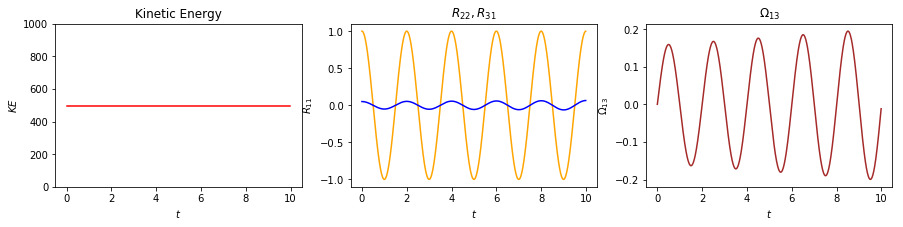

In [8]:
fig = plt.figure(figsize=(15,3))
ax=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax.set_title('Kinetic Energy')
ax.set_xlabel('$t$')
ax.set_ylabel('$KE$')
ax.set_ylim(bottom=0,top=1000)
ax.plot(ts0,KEs0,c='red')

ax2.set_title('$R_{22},R_{31}$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$R_{11}$')
#ax2.set_ylim(bottom=-1,top=1)
ax2.plot(ts0,Rs0[:,1,1],c='orange')
ax2.plot(ts0,Rs0[:,2,0],c='blue')

ax3.set_title('$\Omega_{13}$')
ax3.set_xlabel('$t$')
ax3.set_ylabel('$\Omega_{13}$')
#ax3.set_ylim(bottom=-10,top=10)
ax3.plot(ts0,Omegas0[:,0,2],c='brown')

In [9]:
print(R_init)
print(J_init)
print(Omega_init)
print(L)

print(Omegas0[-1])
print(Rs0[-1])
print(KEs0[2])

[[ 0.99875026  0.         -0.04997917  0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.04997917  0.          0.99875026  0.        ]
 [ 0.          0.          0.          1.        ]]
[[9.97502083e-01 0.00000000e+00 4.99167083e-02 0.00000000e+00]
 [0.00000000e+00 1.00000000e+02 0.00000000e+00 0.00000000e+00]
 [4.99167083e-02 0.00000000e+00 2.49791736e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+02]]
[[ 0.         -3.14159265  0.          0.        ]
 [ 3.14159265  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
[[-0.00000000e+00  3.17293011e+02 -0.00000000e+00 -0.00000000e+00]
 [-3.17293011e+02 -0.00000000e+00 -1.56817964e-01 -0.00000000e+00]
 [-0.00000000e+00  1.56817964e-01 -0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]]
[[ 0.00000000e+00 -3.13516570e+00 -1.16754406e-02  6.78377847e-15]
 

The simulation is highly unstable. $R_{22}$ (yellow) is the y coordinate of the heavy mass $m_2$. It is oscillating with the correct frequency. $R_{31}$ (blue) is the z coordinate of the light mas $m_1$. It is oscillating as expected. The expected frequency is derived as follows. The centrifugal force on each light mass is
    $$F=m_1\omega^2x$$
The effective potential is
    $$U=-\frac{1}{2}m_1\omega^2x^2$$
suppose the light mass is off the equilibrium by angle $\theta$. Then
    $$U=-\frac{1}{2}m_1\omega^2R^2\cos^2\theta$$
Use small angle approx
    $$U=\frac{1}{2}m_1\omega^2R^2\theta^2+\mathrm{Const.}$$
Kinetic energy is
    $$T=\frac{1}{2}m_1R^2\dot{\theta}^2$$
The angular frequency of oscillation is
    $$\sqrt{\frac{m_1\omega^2R^2}{m_1R^2}}=\omega$$
exactly the same as the original oscillation frequency, just like plotted
w dimension is more or less unperturbed, which is good news. The rotation update must be performed in the world frame in this case. Performing it in body frame is incorrect and will break the program

## A general rotation, with three different timesteps

In [10]:
# test parameters
J0 = np.diag([1,2,3,4]) # principal 2nd moments
L = np.array([[0,1,20,3],
              [0,0,10,10],
              [0,0,0,1],
              [0,0,0,0]])# Angular momentum, specify the upper triangle
L = L-L.T # completes the lower half
# run test
ts,qls,qrs,Rs,KEs,Omegas=test(L,J0,dt=0.01,N=1000,dumpFreq=10)
ts2,qls2,qrs2,Rs2,KEs2,Omegas2=test(L,J0,dt=0.005,N=2000,dumpFreq=20)
ts3,qls3,qrs3,Rs3,KEs3,Omegas3=test(L,J0,dt=0.0001,N=100000,dumpFreq=1000)

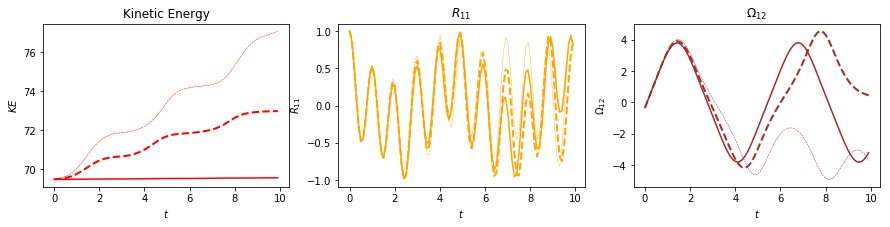

In [11]:
fig = plt.figure(figsize=(15,3))
ax=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax.set_title('Kinetic Energy')
ax.set_xlabel('$t$')
ax.set_ylabel('$KE$')
#ax.set_ylim(bottom=65,top=90)
ax.plot(ts,KEs,'--',linewidth=0.5,c='red')
ax.plot(ts2,KEs2,'--',linewidth=2,c='red')
ax.plot(ts3,KEs3,c='red')

ax2.set_title('$R_{11}$')
ax2.set_xlabel('$t$')
ax2.set_ylabel('$R_{11}$')
#ax2.set_ylim(bottom=-1,top=1)
ax2.plot(ts,Rs[:,0,0],'--',linewidth=0.5,c='orange')
ax2.plot(ts2,Rs2[:,0,0],'--',linewidth=2,c='orange')
ax2.plot(ts3,Rs3[:,0,0],c='orange')

ax3.set_title('$\Omega_{12}$')
ax3.set_xlabel('$t$')
ax3.set_ylabel('$\Omega_{12}$')
#ax3.set_ylim(bottom=-1,top=1)
ax3.plot(ts,Omegas[:,0,1],'--',linewidth=0.5,c='brown')
ax3.plot(ts2,Omegas2[:,0,1],'--',linewidth=2,c='brown')
ax3.plot(ts3,Omegas3[:,0,1],c='brown')

Thin dotted line: dt=0.1, dashed line: dt=0.005, solid line: dt=0.0001. 
This modified algorithm passes all the same tests and has the same kind of poor stability as th e previous algorithm.